In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car.csv')

In [3]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [4]:
#Checking the number of columns and features
df.shape

(892, 6)

In [5]:
df.describe().T

,count,unique,top,freq
name,892,525,Honda City,13
company,892,48,Maruti,235
year,892,61,2015,117
Price,892,274,Ask For Price,35
kms_driven,840,258,"45,000 kms",30
fuel_type,837,3,Petrol,440


## Data Cleaning

In [6]:
# Checking for null values in each columns
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
#Checking number of duplicated rows present
df.duplicated().sum()

94

In [8]:
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
15,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
20,Mahindra Scorpio S10,Mahindra,2016,"3,50,000","43,000 kms",Diesel
24,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
25,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
...,...,...,...,...,...,...
626,Tata Sumo Gold EX BS IV,Tata,2012,"2,10,000","75,000 kms",Diesel
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012,"2,80,000","48,006 kms",Diesel
727,Mahindra Scorpio S4,Mahindra,2015,"8,65,000","30,000 kms",Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol


In [9]:
# Deleting the Duplicated rows
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(798, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    object
 3   Price       798 non-null    object
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: object(6)
memory usage: 43.6+ KB


In [13]:
#All the values that should be numberical are object.
#Converting them to Numerical

In [14]:
df.tail(10)

,name,company,year,Price,kms_driven,fuel_type
882,Maruti Suzuki Alto 800 Select Variant,Maruti,2015,Ask For Price,"70,000 kms",Petrol
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
884,tata zest 2017 f,tata,sale,"4,50,000",NaN,NaN
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [15]:
#Year column got some gibberish values such as 'zest' and 'sale', thats totally irrelevent, so we'll make those values null.

In [16]:
df['year'].dtypes

dtype('O')

In [17]:
df['year'] = pd.to_numeric(df['year'], errors = 'coerce').astype('Int64')
df['year'].dtypes

Int64Dtype()

In [18]:
# For Price column, there are commas in between numerical values and a non-numerical value which we have to get rid of.

In [19]:
df.drop(df[(df['Price'] == 'Ask For Price')].index, inplace=True)

In [20]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce').astype('float64')
df['Price'].dtypes

dtype('float64')

In [21]:
# Kms_driven has commas in numerical value and has 'kms' with numbers

In [22]:
df['kms_driven'] = df['kms_driven'].str.replace(',','').str.replace('kms','')
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors = 'coerce')
df['kms_driven'].dtypes

dtype('float64')

In [23]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [24]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel
7,Hyundai Eon,Hyundai,2013,190000.0,25000.0,Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,830000.0,24530.0,Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,250000.0,60000.0,Petrol
10,Skoda Fabia Classic 1.2 MPI,Skoda,2010,182000.0,60000.0,Petrol
11,Maruti Suzuki Stingray VXi,Maruti,2015,315000.0,30000.0,Petrol


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        765 non-null    object 
 1   company     765 non-null    object 
 2   year        727 non-null    Int64  
 3   Price       765 non-null    float64
 4   kms_driven  725 non-null    float64
 5   fuel_type   724 non-null    object 
dtypes: Int64(1), float64(2), object(3)
memory usage: 42.6+ KB


In [26]:
#Dealing with Missing/Null Values

In [27]:
df.isna().sum()

name           0
company        0
year          38
Price          0
kms_driven    40
fuel_type     41
dtype: int64

In [28]:
percentageNA = df.isna().sum()/len(df) * 100
print(percentageNA)

name          0.000000
company       0.000000
year          4.967320
Price         0.000000
kms_driven    5.228758
fuel_type     5.359477
dtype: float64


In [29]:
#Year column
df.dropna(subset=['year'], inplace=True)
df['year'].dtype

Int64Dtype()

In [30]:
# kms_driven Column
df['kms_driven'] = df['kms_driven'].fillna(df['kms_driven'].mean())

In [31]:
#fuel_type column
df['fuel_type'].mode()

0    Petrol
Name: fuel_type, dtype: object

In [32]:
df['fuel_type'] = df['fuel_type'].fillna('Petrol')

In [33]:
df.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [34]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel
7,Hyundai Eon,Hyundai,2013,190000.0,25000.0,Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,830000.0,24530.0,Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,250000.0,60000.0,Petrol
10,Skoda Fabia Classic 1.2 MPI,Skoda,2010,182000.0,60000.0,Petrol
11,Maruti Suzuki Stingray VXi,Maruti,2015,315000.0,30000.0,Petrol


In [35]:
#The Name is too long for some of the cars so I'll short it down to 3 words or less
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [36]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000.000000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40.000000,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000.0,28000.000000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000.0,36000.000000,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.000000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000.0,132000.000000,Petrol
888,Tata Zest XM,Tata,2018,260000.0,27000.000000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000.0,40000.000000,Diesel
890,Honda Amaze 1.2,Honda,2014,180000.0,46762.664828,Petrol


In [37]:
df.describe()

,year,Price,kms_driven
count,727.0,7.270000e+02,727.000000
mean,2012.321871,4.024270e+05,46762.664828
std,4.117202,4.794797e+05,34512.521095
min,1995.0,3.000000e+04,0.000000
25%,2010.0,1.650000e+05,27000.000000
50%,2013.0,2.900000e+05,42000.000000
75%,2015.0,4.899990e+05,58779.500000
max,2019.0,8.500003e+06,400000.000000


## EDA

In [38]:
#Checking for Outliers

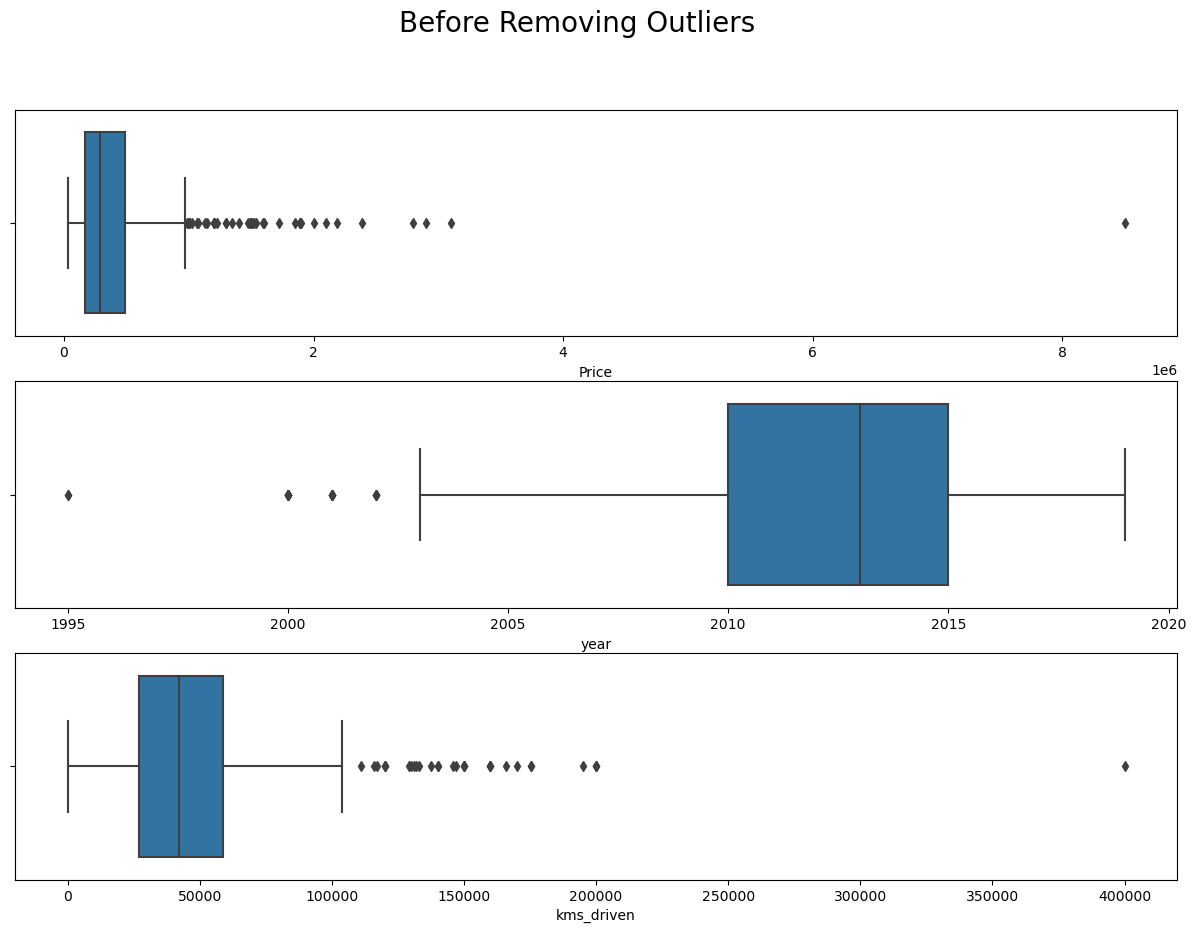

In [39]:
f,a=plt.subplots(3,1,figsize=(15,10), dpi=100)
sns.boxplot(x=df['Price'], ax=a[0])
sns.boxplot(x=df['year'], ax=a[1])
sns.boxplot(x=df['kms_driven'], ax=a[2])
plt.suptitle('Before Removing Outliers', fontsize=20)
plt.show()

In [40]:
from scipy.stats import trim_mean
def outlier_cap(col, proportion):
    Q3=np.percentile(df[col], 75)
    Q1=np.percentile(df[col], 25)
    
    iqr=Q3-Q1
    
    lower_limit = Q1-1.5*iqr
    upper_limit = Q3+1.5*iqr
    
    trimmed_mean = trim_mean(df[col], proportiontocut = proportion)
    df[col] = df[col].apply(lambda x: trimmed_mean if x<lower_limit or x>upper_limit else x)
    return df

outlier_cap('year', 0.1)
outlier_cap('Price', 0.1)
outlier_cap('kms_driven', 0.1)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007.0,80000.0,45000.000000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006.0,425000.0,40.000000,Diesel
3,Hyundai Grand i10,Hyundai,2014.0,325000.0,28000.000000,Petrol
4,Ford EcoSport Titanium,Ford,2014.0,575000.0,36000.000000,Diesel
6,Ford Figo,Ford,2012.0,175000.0,41000.000000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009.0,300000.0,42662.594047,Petrol
888,Tata Zest XM,Tata,2018.0,260000.0,27000.000000,Diesel
889,Mahindra Quanto C8,Mahindra,2013.0,390000.0,40000.000000,Diesel
890,Honda Amaze 1.2,Honda,2014.0,180000.0,46762.664828,Petrol


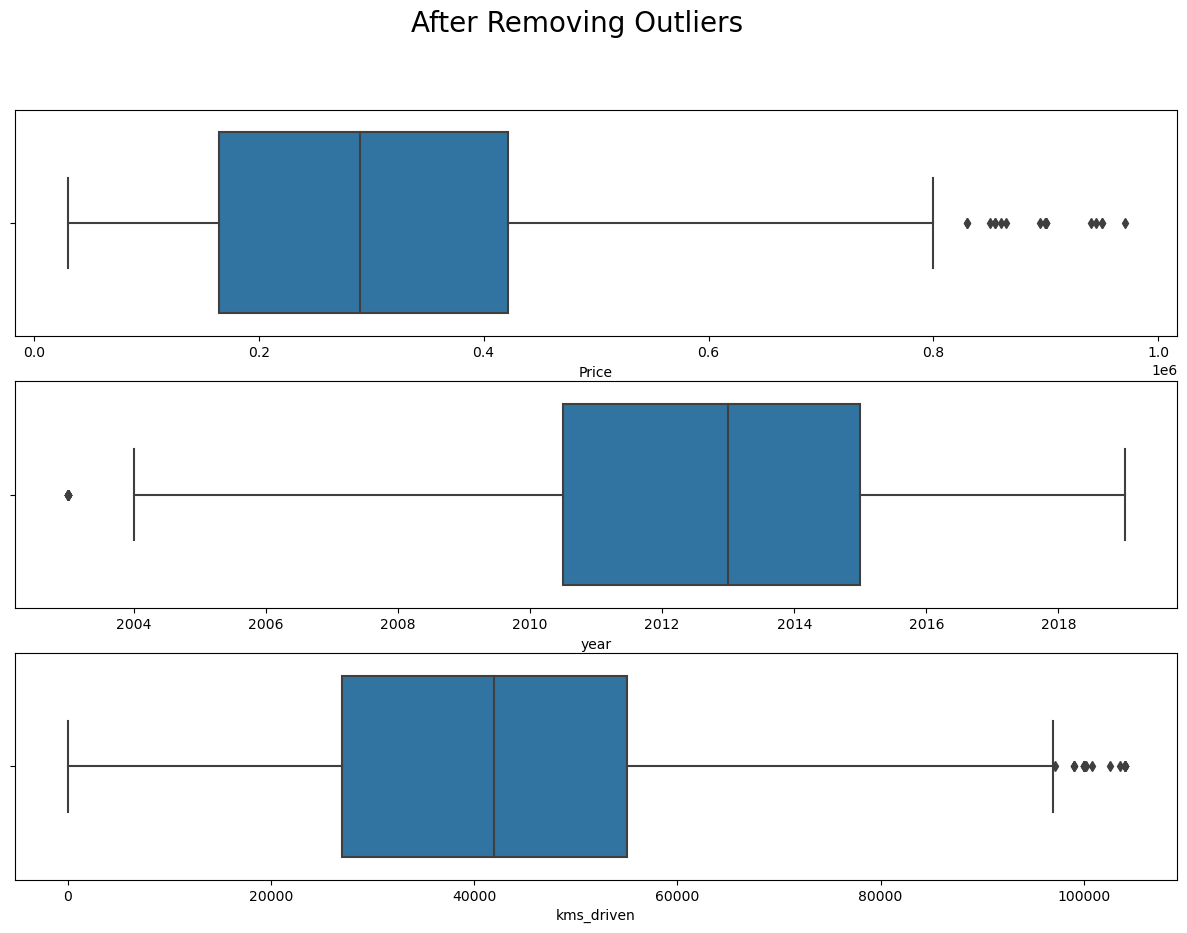

In [41]:
f,a=plt.subplots(3,1,figsize=(15,10), dpi=100)
sns.boxplot(x=df['Price'], ax=a[0])
sns.boxplot(x=df['year'], ax=a[1])
sns.boxplot(x=df['kms_driven'], ax=a[2])
plt.suptitle('After Removing Outliers', fontsize=20)
plt.show()

In [42]:
df.describe()

,year,Price,kms_driven
count,727.000000,727.000000,727.000000
mean,2012.632905,317846.907321,41867.347655
std,3.619155,195899.780459,23080.271835
min,2003.000000,30000.000000,0.000000
25%,2010.500000,165000.000000,27000.000000
50%,2013.000000,290000.000000,42000.000000
75%,2015.000000,421500.000000,55000.000000
max,2019.000000,970000.000000,104000.000000


In [44]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006.0,425000.0,40.0,Diesel
3,Hyundai Grand i10,Hyundai,2014.0,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium,Ford,2014.0,575000.0,36000.0,Diesel
6,Ford Figo,Ford,2012.0,175000.0,41000.0,Diesel


In [47]:
df['year']=df['year'].astype(int)

In [50]:
df.year.dtype

dtype('int32')

In [51]:
#Storing our cleaned data
df.to_csv('cars Cleaned.csv')

In [43]:
#Checking importance of columns

In [45]:
# Checking the Correlation
correlation = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
correlation

Price         1.000000
year          0.487322
kms_driven   -0.172223
Name: Price, dtype: float64

<Axes: >

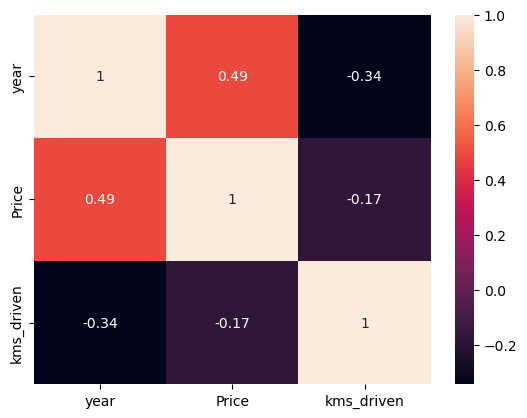

In [46]:
# Plotting Heatmap for Correlation
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [47]:
# Checking the Skewness of columns

Year --------> -0.6444390133789406


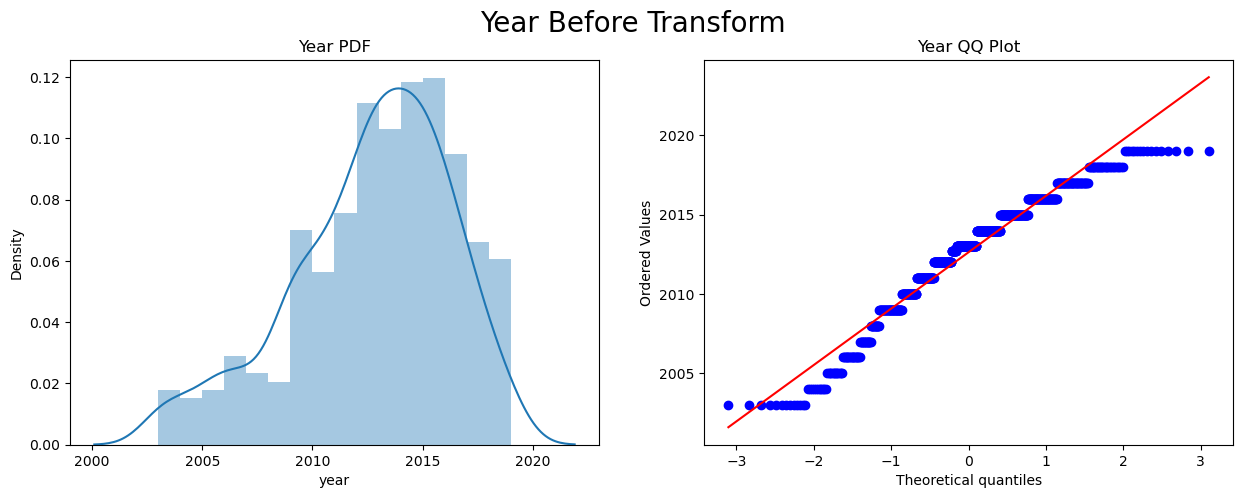

In [48]:
plt.figure(figsize=(15,5), dpi=100)
print('Year', '-------->', df['year'].skew())
plt.subplot(121)
sns.distplot(df['year'])
plt.title('Year PDF')
    
plt.subplot(122)
stats.probplot(df['year'], dist='norm', plot=plt)
plt.title('Year QQ Plot')

plt.suptitle('Year Before Transform', fontsize=20)
plt.show()

KMS Driven --------> 0.420867430938267


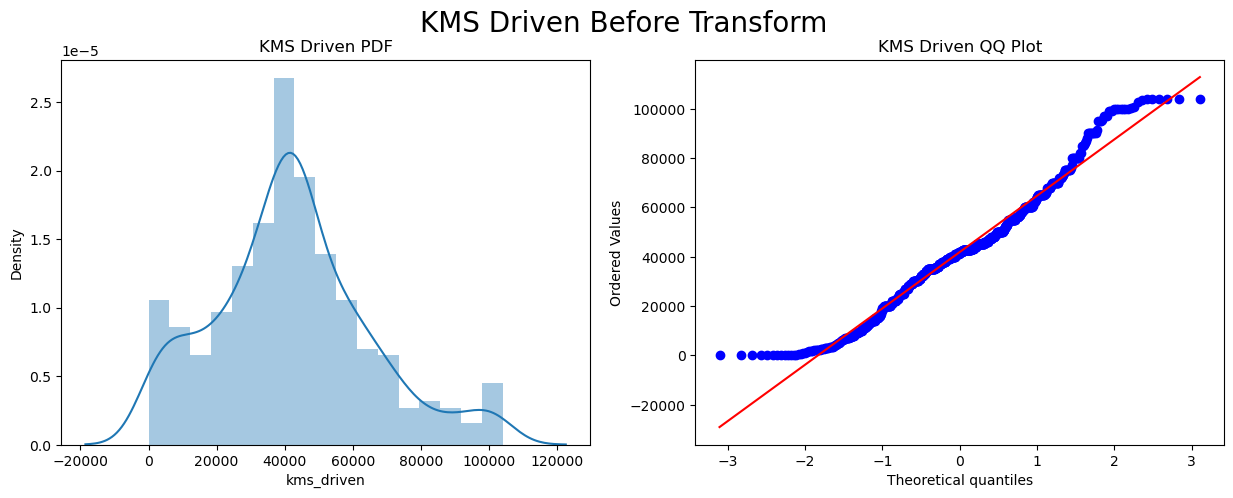

In [49]:
plt.figure(figsize=(15,5), dpi=100)
print('KMS Driven', '-------->', df['kms_driven'].skew())
plt.subplot(121)
sns.distplot(df['kms_driven'])
plt.title('KMS Driven PDF')
    
plt.subplot(122)
stats.probplot(df['kms_driven'], dist='norm', plot=plt)
plt.title('KMS Driven QQ Plot')

plt.suptitle('KMS Driven Before Transform', fontsize=20)
plt.show()

In [50]:
trf=PowerTransformer()
df2=df.drop(['name', 'company', 'fuel_type'], axis=1)
x_trf = trf.fit_transform(df2)
x_trf = pd.DataFrame(x_trf)

In [51]:
x_trf.head()

,0,1,2
0,-1.535821,-1.547230,0.233321
1,-1.781507,0.694182,-2.420177
2,0.351006,0.246646,-0.494005
3,0.351006,1.247927,-0.137484
4,-0.219273,-0.647594,0.071887


Year --------> -0.45090103406332016


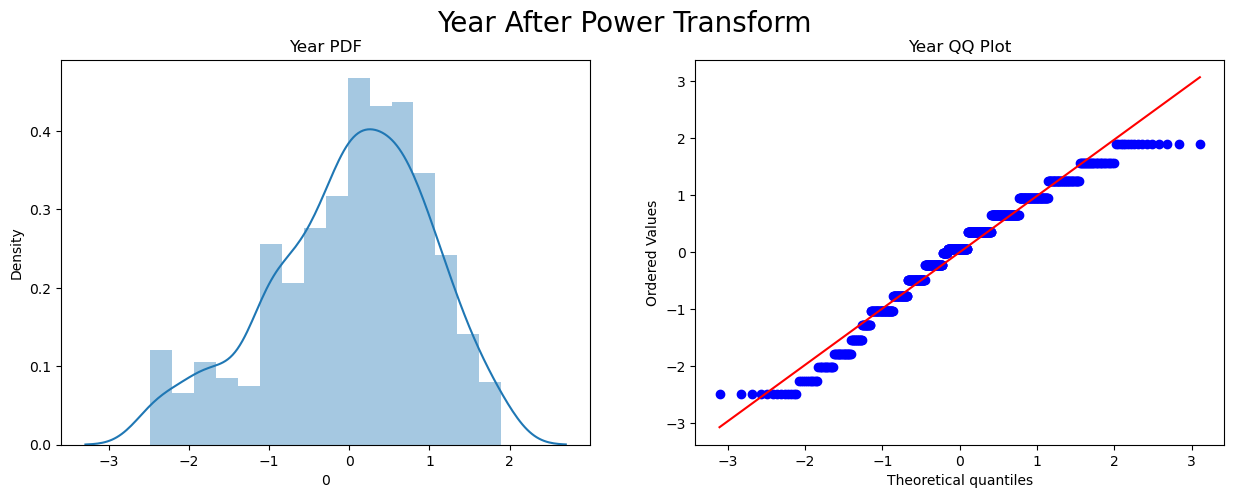

In [52]:
plt.figure(figsize=(15,5), dpi=100)
print('Year', '-------->', x_trf[0].skew())
plt.subplot(121)
sns.distplot(x_trf[0])
plt.title('Year PDF')
    
plt.subplot(122)
stats.probplot(x_trf[0], dist='norm', plot=plt)
plt.title('Year QQ Plot')

plt.suptitle('Year After Power Transform', fontsize=20)
plt.show()

KMS Driven --------> -0.25321924886294644


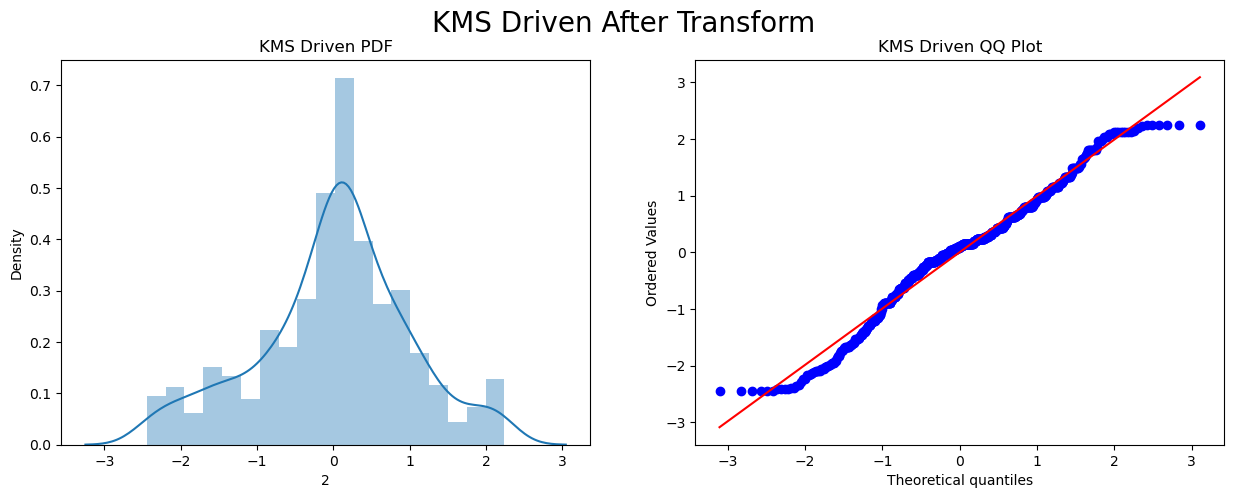

In [53]:
plt.figure(figsize=(15,5), dpi=100)
print('KMS Driven', '-------->', x_trf[2].skew())
plt.subplot(121)
sns.distplot(x_trf[2])
plt.title('KMS Driven PDF')
    
plt.subplot(122)
stats.probplot(x_trf[2], dist='norm', plot=plt)
plt.title('KMS Driven QQ Plot')

plt.suptitle('KMS Driven After Transform', fontsize=20)
plt.show()

## Model Building and Transformations

In [54]:
x=df.drop(columns='Price')
y=df['Price']

In [55]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007.0,45000.000000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006.0,40.000000,Diesel
3,Hyundai Grand i10,Hyundai,2014.0,28000.000000,Petrol
4,Ford EcoSport Titanium,Ford,2014.0,36000.000000,Diesel
6,Ford Figo,Ford,2012.0,41000.000000,Diesel
...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009.0,42662.594047,Petrol
888,Tata Zest XM,Tata,2018.0,27000.000000,Diesel
889,Mahindra Quanto C8,Mahindra,2013.0,40000.000000,Diesel
890,Honda Amaze 1.2,Honda,2014.0,46762.664828,Petrol


In [56]:
y

0       80000.0
1      425000.0
3      325000.0
4      575000.0
6      175000.0
         ...   
886    300000.0
888    260000.0
889    390000.0
890    180000.0
891    160000.0
Name: Price, Length: 727, dtype: float64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [58]:
ohe = OneHotEncoder()
ohe.fit(x[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [59]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [60]:
x_transform = make_column_transformer((PowerTransformer(),['year', 'kms_driven']),
                                      (OneHotEncoder(categories=ohe.categories_),
                                      ['name', 'company', 'fuel_type']), remainder='passthrough')

In [61]:
#Applying Linear Regression
lr = LinearRegression()

In [62]:
pipe = make_pipeline(x_transform, lr)
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powertransformer',
                                                  PowerTransformer(),
                                                  ['year', 'kms_driven']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'B...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [63]:
y_pred = pipe.predict(x_test)
y_pred

array([ 279812.0654339 ,   78856.28462301,  361185.37767353,
        597042.75994123,  203143.39935895,  243240.84279847,
        388455.50796674,  254574.39604802,  464046.59162175,
         12934.31009338,  425319.81725665,  201738.61829908,
        417420.70920516,  130996.30992681,  205936.06042287,
        345341.15234334,  240733.94794584,  161155.84209147,
        369890.70553202,  451931.50648962,  325001.34922105,
        254684.28477764,   96054.82650429,  261992.91894125,
        550040.64457657,   36523.51643937,   49742.6667102 ,
        250040.78552887,  271638.74392753,  446793.16305329,
        325987.37057669,  808311.30093327,  336636.08822093,
         20639.98386399,  458980.83519545,  193904.26214987,
        244883.46147369,  236525.37286239,  760862.42149557,
         30942.60184233,  312746.01142577,  130508.04200809,
        281602.35580717,  472961.85335736, -118180.00177516,
        550230.62306606,  126477.86273358,  285469.80624247,
        480865.74715968,

In [64]:
r2_score(y_test, y_pred)

0.5282026379930801

In [65]:
scores=[]
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    pipe = make_pipeline(x_transform, lr)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [66]:
np.argmax(scores)

941

In [67]:
scores[np.argmax(scores)]

0.7162364301275115

In [94]:
#Decision Tree
scoresDT=[]
for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    dt=DecisionTreeRegressor()
    pipeDT = make_pipeline(x_transform, dt)
    pipeDT.fit(x_train, y_train)
    y_pred_DT = pipeDT.predict(x_test)
    scoresDT.append(r2_score(y_test, y_pred_DT))

print(np.argmax(scoresDT))
print(scoresDT[np.argmax(scoresDT)])

549
0.6490401961789245


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(scoresDT))
scoresDT=[]
for i in range (1,100):
    dt=DecisionTreeRegressor(max_depth=i)
    pipeDT = make_pipeline(x_transform, dt)
    pipeDT.fit(x_train, y_train)
    y_pred_DT = pipeDT.predict(x_test)
    scoresDT.append(r2_score(y_test, y_pred_DT))

print(np.argmax(scoresDT))
print(scoresDT[np.argmax(scoresDT)])

48
0.6899217794356727


In [92]:
#Random Forest Regressor
scoresRF=[]
for i in range (500):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    rf=RandomForestRegressor()
    pipeRF = make_pipeline(x_transform, rf)
    pipeRF.fit(x_train, y_train)
    y_pred_RF = pipeRF.predict(x_test)
    scoresRF.append(r2_score(y_test, y_pred_RF))

print(np.argmax(scoresRF))
print(scoresRF[np.argmax(scoresRF)])

449
0.7375252759344022


In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(scoresRF))
scoresRF=[]
for i in range (1,100):
    rf=RandomForestRegressor(max_depth=i)
    pipeRF = make_pipeline(x_transform, rf)
    pipeRF.fit(x_train, y_train)
    y_pred_RF = pipeRF.predict(x_test)
    scoresRF.append(r2_score(y_test, y_pred_RF))

print(np.argmax(scoresRF))
print(scoresRF[np.argmax(scoresRF)])

71
0.7528362219939173


In [97]:
#Predicting the car price
pipeRF.predict(pd.DataFrame([['Honda City VX', 'Honda', 2023, 500, 'Petrol']],
                        columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([643398.06377359])

In [98]:
import pickle
pickle.dump(pipeRF, open('RandomForestRegressionModel.pkl', 'wb'))